## 设置

In [1]:
%matplotlib inline

In [2]:
import bnpy
import numpy as np
import os

from matplotlib import pylab
import seaborn as sns

FIG_SIZE = (3, 3)
SMALL_FIG_SIZE = (1,1)
pylab.rcParams['figure.figsize'] = FIG_SIZE

top_word_kws = dict(
    wordSizeLimit=15,
    ncols=4,
    Ktop=10) 

## 整理输入数据

In [34]:
data = np.load('TADstate.mat.npy') ## from Pre.ipynb
uUniqueToken = 178*200
word_id = np.repeat(np.array([i for i in range(200)])[np.newaxis,...],178,axis=0).flatten()
word_count = data.flatten()
doc_range = np.array([i*200 for i in range(179)])
vocabList = [str(i) for i in range(200)]
datainput = bnpy.data.BagOfWordsData(word_id=word_id,word_count=word_count,nDocTotal=nDoc,doc_range=doc_range,vocab_size=vocab_size)

## 训练模型

In [36]:
#data = np.load('TADstate.mat.npy')
trained_model, info_dict = bnpy.run(
    datainput, 'DPMixtureModel', 'Mult', 'VB',
    output_path='./TAD',
    nLap=1000, convergeThr=0.0001, nTask=10,
    K=3, initname='bregmankmeans+lam1+iter1',
    gamma0=50.0, lam=0.1)

Dataset Summary:
BagOfWordsData
  size: 178 units (documents)
  vocab size: 200
  min    5%   50%   95%   max 
  200   200   200   200   200  nUniqueTokensPerDoc
  394   398   456  1518  2052  nTotalTokensPerDoc
Hist of word_count across tokens 
      1      2      3    <10   <100  >=100
   0.01   0.70   0.07   0.21   0.01      0
Hist of unique docs per word type
     <1    <10   <100  >=100
      0      0      0   >.99
Allocation Model:  DP mixture with K=0. Concentration gamma0= 50.00
Obs. Data  Model:  Multinomial over finite vocabulary.
Obs. Data  Prior:  Dirichlet over finite vocabulary 
  lam = [0.1 0.1] ...
Initialization:
  initname = bregmankmeans+lam1+iter1
  K = 3 (number of clusters)
  seed = 1607680
Preparing target dataset for Bregman k-means analysis...
  Using entire provided dataset of 178.00 docs (BagOfWordsData fmt).
  No LP provided for specialized targeting.
Running Bregman k-means with K=3 for 1 iters
iter 0: Lscore 5.977e+05
     166       9       3
Bregman k-mea

       10/1000 after      0 sec. |    182.4 MiB | K    3 | loss  5.304201073e+00 | Ndiff    0.000 
... done. converged.
Preparing target dataset for Bregman k-means analysis...
  Using entire provided dataset of 178.00 docs (BagOfWordsData fmt).
  No LP provided for specialized targeting.
Running Bregman k-means with K=3 for 1 iters
iter 0: Lscore 5.978e+05
       9     163       6
Bregman k-means DONE. Delivered 3 non-empty clusters
Learn Alg: VB | task  7/10 | alg. seed: 9041408 | data order seed: 3441280
task_output_path: ./TAD/7
        1/1000 after      0 sec. |    182.4 MiB | K    3 | loss  5.306615501e+00 |  
        2/1000 after      0 sec. |    182.4 MiB | K    3 | loss  5.305368706e+00 | Ndiff    4.614 
        3/1000 after      0 sec. |    182.4 MiB | K    3 | loss  5.305285857e+00 | Ndiff    1.174 
        4/1000 after      0 sec. |    182.4 MiB | K    3 | loss  5.305283020e+00 | Ndiff    0.244 
        5/1000 after      0 sec. |    182.4 MiB | K    3 | loss  5.305282893e+0

## 输出模型参数

In [38]:
trained_model.obsModel.setEstParamsFromPost(trained_model.obsModel.Post)
re = trained_model.calc_local_params(datainput)['resp']
c1 = np.where(np.argmax(re,1)==0)
np.save('c1index.txt',c1)
c2 = np.where(np.argmax(re,1)==1)
np.save('c2index.txt',c2)
c3 = np.where(np.argmax(re,1)==2)
np.save('c3index.txt',c3)
LP= trained_model.calc_local_params(datainput)
SS = trained_model.get_global_suff_stats(datainput,LP)
update = trained_model.update_global_params(SS)
evidence = trained_model.calc_evidence(datainput,SS,LP)
ML = trained_model.calcLogLikCollapsedSamplerState(SS)

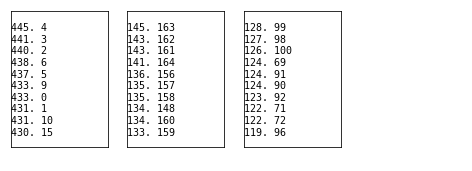

In [31]:
## 可视化
bnpy.viz.PrintTopics.plotCompsFromHModel(
    trained_model,
    vocabList=[str(i) for i in range(200)],
    **top_word_kws)